In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size= 1500)
lngs = np.random.uniform(-90.000, 90.000, size= 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import CitiPy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import requests library
import requests

# Import weather_api_key
from config import weather_api_key

In [7]:
# Build the basic URL for the OpenWeatherMap + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | dharmavaram
Processing Record 4 of Set 1 | salmas
Processing Record 5 of Set 1 | los llanos de aridane
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | semey
Processing Record 9 of Set 1 | najran
Processing Record 10 of Set 1 | tocopilla
Processing Record 11 of Set 1 | wagar
Processing Record 12 of Set 1 | tornio
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | husavik
Processing Record 15 of Set 1 | bardiyah
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | castrillon
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | clarence town
Processing Record 20 of Set 1 | puerto el triunfo
Processing Record 21 of Set 1 | jalu
Proc

Processing Record 38 of Set 4 | dera bugti
Processing Record 39 of Set 4 | senno
Processing Record 40 of Set 4 | uyskoye
Processing Record 41 of Set 4 | nizwa
Processing Record 42 of Set 4 | saint-augustin
Processing Record 43 of Set 4 | orcopampa
Processing Record 44 of Set 4 | buckingham
Processing Record 45 of Set 4 | bahia honda
Processing Record 46 of Set 4 | praia da vitoria
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | discovery bay
Processing Record 49 of Set 4 | cockburn town
Processing Record 50 of Set 4 | mastic beach
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | perivolion
Processing Record 3 of Set 5 | catalina
Processing Record 4 of Set 5 | vestmannaeyjar
Processing Record 5 of Set 5 | saint-leu
Processing Record 6 of Set 5 | san pedro
Processing Record 7 of Set 5 | itaituba
Processing Record 8 of Set 5 | carutapera
Processing Record 9 of Set 5 | timra
Processing Record 10 of Set 5 | holetow

Processing Record 31 of Set 8 | beni
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | ibresi
Processing Record 34 of Set 8 | hagerstown
Processing Record 35 of Set 8 | maltahohe
Processing Record 36 of Set 8 | dakoro
Processing Record 37 of Set 8 | tamandare
Processing Record 38 of Set 8 | usinsk
Processing Record 39 of Set 8 | paranaiba
Processing Record 40 of Set 8 | pokhara
Processing Record 41 of Set 8 | moratuwa
Processing Record 42 of Set 8 | kachiry
Processing Record 43 of Set 8 | korla
Processing Record 44 of Set 8 | astana
Processing Record 45 of Set 8 | taltal
Processing Record 46 of Set 8 | sao jose da coroa grande
Processing Record 47 of Set 8 | pio xii
Processing Record 48 of Set 8 | manta
Processing Record 49 of Set 8 | lyubinskiy
Processing Record 50 of Set 8 | elizabethtown
Processing Record 1 of Set 9 | qandala
Processing Record 2 of Set 9 | akdepe
Processing Record 3 of Set 9 | grand-santi
Processing Record 4 of Set 9 | yarega
Processing Recor

Processing Record 19 of Set 12 | tarudant
City not found. Skipping...
Processing Record 20 of Set 12 | pemba
Processing Record 21 of Set 12 | la asuncion
Processing Record 22 of Set 12 | savannah bight
Processing Record 23 of Set 12 | consuegra
Processing Record 24 of Set 12 | sao filipe
Processing Record 25 of Set 12 | kollumerland
City not found. Skipping...
Processing Record 26 of Set 12 | guanaja
Processing Record 27 of Set 12 | takoradi
Processing Record 28 of Set 12 | kourou
Processing Record 29 of Set 12 | krasnogvardeyets
Processing Record 30 of Set 12 | tucurui
Processing Record 31 of Set 12 | kondoa
Processing Record 32 of Set 12 | kapoeta
Processing Record 33 of Set 12 | kalmunai
Processing Record 34 of Set 12 | loding
Processing Record 35 of Set 12 | waycross
Processing Record 36 of Set 12 | bohicon
Processing Record 37 of Set 12 | aklera
Processing Record 38 of Set 12 | ekpoma
Processing Record 39 of Set 12 | hartselle
Processing Record 40 of Set 12 | raudeberg
Processing 

In [10]:
len(city_data)

577

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,61.56,93,66,22.57,PT,2022-04-27 02:46:25
1,Busselton,-33.6500,115.3333,63.93,62,34,11.72,AU,2022-04-27 02:46:25
2,Dharmavaram,14.4333,77.7167,91.31,32,3,6.02,IN,2022-04-27 02:44:21
3,Salmas,38.1973,44.7653,54.66,73,99,2.19,IR,2022-04-27 02:46:26
4,Los Llanos De Aridane,28.6585,-17.9182,58.75,79,40,9.22,ES,2022-04-27 02:46:26
5,Hermanus,-34.4187,19.2345,50.81,82,0,9.86,ZA,2022-04-27 02:46:27
6,Semey,50.4111,80.2275,52.02,43,0,6.71,KZ,2022-04-27 02:46:27
7,Najran,17.4924,44.1277,70.45,50,1,0.60,SA,2022-04-27 02:46:28
8,Tocopilla,-22.0920,-70.1979,65.91,71,89,8.86,CL,2022-04-27 02:41:53
9,Wagar,16.1525,36.2032,83.93,30,36,7.65,SD,2022-04-27 02:46:29


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign new column order to DataFrame
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2022-04-27 02:46:25,39.0500,-27.9833,61.56,93,66,22.57
1,Busselton,AU,2022-04-27 02:46:25,-33.6500,115.3333,63.93,62,34,11.72
2,Dharmavaram,IN,2022-04-27 02:44:21,14.4333,77.7167,91.31,32,3,6.02
3,Salmas,IR,2022-04-27 02:46:26,38.1973,44.7653,54.66,73,99,2.19
4,Los Llanos De Aridane,ES,2022-04-27 02:46:26,28.6585,-17.9182,58.75,79,40,9.22
5,Hermanus,ZA,2022-04-27 02:46:27,-34.4187,19.2345,50.81,82,0,9.86
6,Semey,KZ,2022-04-27 02:46:27,50.4111,80.2275,52.02,43,0,6.71
7,Najran,SA,2022-04-27 02:46:28,17.4924,44.1277,70.45,50,1,0.60
8,Tocopilla,CL,2022-04-27 02:41:53,-22.0920,-70.1979,65.91,71,89,8.86
9,Wagar,SD,2022-04-27 02:46:29,16.1525,36.2032,83.93,30,36,7.65


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

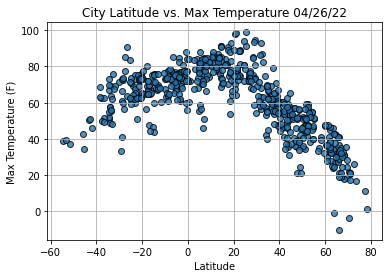

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

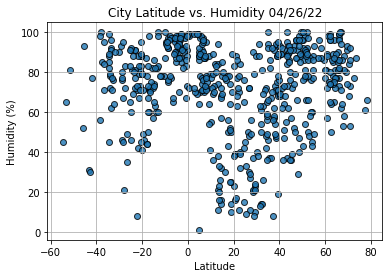

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

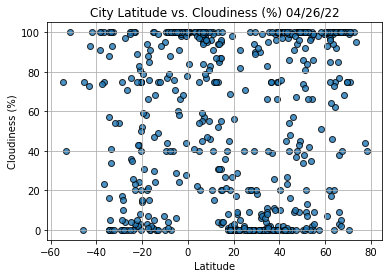

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

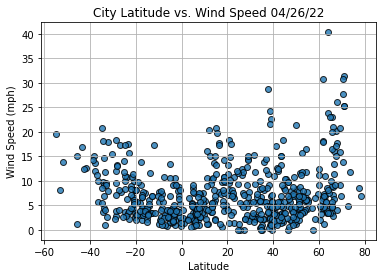

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()